### IE582 - Fall 2021
#### HOMEWORK 3


In [162]:
require(usedist)
require(ggplot2)
require(data.table)
require(caret)
require(TSrepr)
require(TSdist)
require(tidyverse)

theme_set(theme_bw())
options(scipen=999)
options(repr.plot.width=15, repr.plot.height=8)

Loading required package: usedist
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'usedist'"Loading required package: TSrepr
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'TSrepr'"Loading required package: TSdist
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'TSdist'"Loading required package: tidyverse
Error: package or namespace load failed for 'tidyverse' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.10 is required


In [97]:
getwd()
setwd('C:/Users/asus_pinar/desktop/files')
getwd()

[1] "C:/Users/asus_pinar/desktop/files"

[1] "C:/Users/asus_pinar/desktop/files"

### READING DATA

In [98]:

x_train = read.table("uWaveGestureLibrary_X_TRAIN")
y_train = read.table("uWaveGestureLibrary_Y_TRAIN")
z_train = read.table("uWaveGestureLibrary_Z_TRAIN")

x_test = read.table("uWaveGestureLibrary_X_TEST")
y_test = read.table("uWaveGestureLibrary_Y_TEST")
z_test = read.table("uWaveGestureLibrary_Z_TEST")

In [99]:
head(x_train)
nrow(x_train)
ncol(x_train)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


[1] 896

[1] 316

In [100]:
head(x_test)
nrow(x_test)
ncol(x_test)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
5,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368,-0.9546368
1,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,-0.4794209,-0.4344959,-0.3895710,-0.3446460,-0.3280956,-0.3204256,-0.3204256,-0.3204256,-0.3204256,-0.3204256
4,1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,...,-0.5776702,-0.5745679,-0.5693148,-0.5606727,-0.5528700,-0.5457790,-0.5436100,-0.5436100,-0.5436100,-0.5436100
4,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,-1.2895413,-1.3028345,-1.3161278,-1.3294211,-1.3427144,-1.3560076,-1.3693009,-1.3825941,-1.3958874,-1.4091806
5,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.5168717,-0.4987513,-0.4806309,-0.4625106,-0.4443902,-0.4262698,-0.4081494,-0.3900290,-0.3719087,-0.3537883
4,1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,...,-1.6309891,-1.6712903,-1.7273035,-1.7974353,-1.8675672,-1.9128071,-1.9240282,-1.9246077,-1.9246077,-1.9246077


[1] 3582

[1] 316

### TASK 1

As the strategy used in Homework2 train data is concatenated such that each row corresponds to the acceleration data of one motion. The first column is the class column. Columns 2 to 316 are the X axis data, 317 to 631 are Y axis data and 632 to 946 are Z axis data.

In [101]:
#concatenating train data

concatenated_train = cbind(x_train,y_train [,-1])
concatenated_train = cbind(concatenated_train, z_train[,-1])
ncol(concatenated_train)
nrow(concatenated_train)

[1] 946

[1] 896

In [102]:
colnames(concatenated_train)[1] = "class"
colnames(concatenated_train)[2:316] = paste("X.", 1:315)
colnames(concatenated_train)[317:631] = paste("Y.", 1:315)
colnames(concatenated_train)[632:946] = paste("Z.", 1:315)
head(concatenated_train)

class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [103]:
#concatenating test data

concatenated_test = cbind(x_test,y_test[,-1])
concatenated_test = cbind(concatenated_test, z_test[,-1])
ncol(concatenated_test)
nrow(concatenated_test)

colnames(concatenated_test)[1] = "class"
colnames(concatenated_test)[2:316] = paste("X.", 1:315)
colnames(concatenated_test)[317:631] = paste("Y.", 1:315)
colnames(concatenated_test)[632:946] = paste("Z.", 1:315)
head(concatenated_test)

[1] 946

[1] 3582

class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
5,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
1,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
4,1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
4,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
5,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
4,1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


In [104]:
#combining test and train data for distance calculation

complete_series_concat = rbind(concatenated_train,concatenated_test)
nrow(complete_series_concat)
ncol(complete_series_concat)

[1] 4478

[1] 946

In [105]:
   

train_indices=1:nrow(concatenated_train)
head(train_indices)
tail(train_indices)
test_indices=(nrow(concatenated_train)+1):(nrow(concatenated_train)+nrow(concatenated_test))
head(test_indices)
tail(test_indices)

[1] 1 2 3 4 5 6

[1] 891 892 893 894 895 896

[1] 897 898 899 900 901 902

[1] 4473 4474 4475 4476 4477 4478

EUCLIDEAN DISTANCE

As the first distance measure Euclidean Distance is chosen. To calculate distance between each pair of observations dist function is used and output is a dist object.

In [106]:
euc_dist_train= dist((concatenated_train[,-1]), method="euclidean", upper = T)


In [107]:
euc_dist_train = as.matrix(euc_dist_train)
head(euc_dist_train)

1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
0.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,46.01287,39.73031,41.26587,37.26560,52.64993,34.61732,40.36802,43.59052,47.17981,52.29014
51.30385,0.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,46.03559,49.01368,32.31978,49.04021,34.11599,44.40307,54.65286,41.24253,43.26349,24.41367
46.49263,26.15062,0.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,49.77938,43.33303,34.88315,48.61401,36.60350,37.87980,49.85753,47.86957,52.75303,23.00783
50.00557,36.84757,43.11491,0.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,41.21545,38.46376,47.07113,44.03824,33.65578,43.62841,45.17318,36.47610,37.77271,37.73935
40.53065,32.71092,34.68557,45.09594,0.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,47.36377,53.91140,17.27920,36.79339,49.61586,44.74386,44.68900,45.79881,44.43520,39.75526
48.77339,37.63036,34.77018,41.03078,36.55246,0.00000,48.51623,48.43767,42.56081,51.06056,...,48.74836,52.96310,37.81844,42.26116,40.39066,46.14251,39.92165,43.24382,47.93611,32.42908


In [108]:
big_num = 999999
diag(euc_dist_train) = big_num
head(euc_dist_train)

1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
999999.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,46.01287,39.73031,41.26587,37.26560,52.64993,34.61732,40.36802,43.59052,47.17981,52.29014
51.30385,999999.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,46.03559,49.01368,32.31978,49.04021,34.11599,44.40307,54.65286,41.24253,43.26349,24.41367
46.49263,26.15062,999999.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,49.77938,43.33303,34.88315,48.61401,36.60350,37.87980,49.85753,47.86957,52.75303,23.00783
50.00557,36.84757,43.11491,999999.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,41.21545,38.46376,47.07113,44.03824,33.65578,43.62841,45.17318,36.47610,37.77271,37.73935
40.53065,32.71092,34.68557,45.09594,999999.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,47.36377,53.91140,17.27920,36.79339,49.61586,44.74386,44.68900,45.79881,44.43520,39.75526
48.77339,37.63036,34.77018,41.03078,36.55246,999999.00000,48.51623,48.43767,42.56081,51.06056,...,48.74836,52.96310,37.81844,42.26116,40.39066,46.14251,39.92165,43.24382,47.93611,32.42908


In [109]:
min_dist = apply(euc_dist_train,2,min,na.rm=TRUE)
min_index = apply(euc_dist_train,2, which.min)
print("min distances for first 10 observations")
head(min_dist,10)
print("min distance indexes for first 10 observations")
head(min_index,10)

[1] "min distances for first 10 observations"


1         2         3         4         5         6         7         8 
21.996785  9.000705 15.539400 26.456485 16.302987 13.547054  8.809711 12.700987 
        9        10 
12.307686 12.134957

[1] "min distance indexes for first 10 observations"


1   2   3   4   5   6   7   8   9  10 
214 471 149  12 445 525 820 241 580 484

In [110]:
NN_classifier= data.table(series = c(1:nrow(concatenated_train)))
NN_classifier$class = concatenated_train$class
NN_classifier$NN_euc = min_index
NN_classifier$NN_euc_class = concatenated_train$class[min_index]
NN_classifier$NN_euc_correct =(NN_classifier$class==NN_classifier$NN_euc_class)
head(NN_classifier)
accuracy = print(sum(NN_classifier$NN_euc_correct)/nrow(NN_classifier))

series,class,NN_euc,NN_euc_class,NN_euc_correct
1,6,214,6,TRUE
2,5,471,5,TRUE
3,5,149,5,TRUE
4,3,12,7,FALSE
5,4,445,4,TRUE
6,8,525,8,TRUE


[1] 0.9464286


### A) 10-Fold CV with Euclidean and Manhattan Distance for k-NN Parameter k

10-fold CV

In [111]:
get_cv_NN = function(data_set, neighbors){
    
    #10-fold cv folds
    set.seed(12345)
    folds = createFolds(1:nrow(data_set), k = 10, list = TRUE, returnTrain = FALSE)  
    
    accuracy = rep(NA, 10)  #accuracy for each fold
    
    #Get distance matrix
    euc_dist= dist((data_set[,-1]), method="euclidean", upper = T)
    euc_dist= as.matrix(euc_dist)
    diag(euc_dist) = 999999
    
    
    for(i in 1:10){    
    
        #create test&train data based on folds
        cv_test = data_set[(folds[[i]]),]
        cv_train = data_set[-(folds[[i]]),]  

        
        #print(folds[[i]])
        
        euc_dist_copy = euc_dist
        
        
        #to avoid selecting a test instance as NN
        euc_dist_copy[,c(folds[[i]])] = NA
        #print(euc_dist)
        
        
        NN_list = data.frame(observation=(folds[[i]]))
            NN_list$class_count_1 = 0
            NN_list$class_count_2 = 0
            NN_list$class_count_3 = 0
            NN_list$class_count_4 = 0
            NN_list$class_count_5 = 0
            NN_list$class_count_6 = 0
            NN_list$class_count_7 = 0
            NN_list$class_count_8 = 0
            
    
        for (row in folds[[i]]){
            #print("instance")
            #print(row)
            
            for(K in 1:neighbors){
            
               min_index = which.min((euc_dist_copy)[row,])
                #print("min index")
                #print(min_index)
                
              
                col_label = paste("NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = min_index
               
                
                col_label = paste("class_of_NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = data_set$class[min_index]
                
                
                nn_class = data_set$class[min_index]
                 #print("class")
                 #print(nn_class)
               
                
                class_col_label = paste("class_count", nn_class, sep="_")
               
                NN_list[NN_list$observation==row, class_col_label] = NN_list[NN_list$observation==row, class_col_label]+1
                
                
                euc_dist_copy[row, min_index] = 999999
                #print(head(NN_list))
           }          
       }
        
        
        NN_classifier= data.table(series = (folds[[i]]))
        NN_classifier$class = cv_test$class
        #print(head(NN_classifier))
 
        
        #GET MAJORITY VOTING TO PREDICT CLASS
        major_vote = list()
        
        for (index in 1:length(folds[[i]])){
            
            major_vote=append(major_vote,which.max(c(NN_list$class_count_1[index], NN_list$class_count_2[index], NN_list$class_count_3[index],
                               NN_list$class_count_4[index], NN_list$class_count_5[index], NN_list$class_count_6[index],
                           NN_list$class_count_7[index], NN_list$class_count_8[index])) )
         }

        NN_classifier$NN_euc_class = major_vote
     
        
        #GET ACCURACY
        NN_classifier$NN_euc_correct =(NN_classifier$class==NN_classifier$NN_euc_class)
        #print(head(NN_classifier))

        accuracy[i] = ( sum(NN_classifier$NN_euc_correct)/nrow(NN_classifier))
        #print(accuracy)
    }

    return(accuracy)
}


In [112]:
set = c(1,2,3,4,5,6,7,8,9,10)
euc_distance_parameters = data.frame("k"=set)
euc_distance_parameters$mean_accuracy = -555
euc_distance_parameters

k,mean_accuracy
1,-555
2,-555
3,-555
4,-555
5,-555
6,-555
7,-555
8,-555
9,-555
10,-555


In [113]:
for(nn in set){
    accur = get_cv_NN(concatenated_train,nn)
    print(accur)
    euc_distance_parameters$mean_accuracy[nn] = mean(accur)

}

 [1] 0.9560440 0.9325843 0.8988764 0.9450549 0.9550562 0.9545455 0.9777778
 [8] 0.9340659 0.9550562 0.9662921
 [1] 0.9450549 0.9101124 0.8539326 0.9340659 0.9213483 0.8977273 0.9888889
 [8] 0.9450549 0.9213483 0.9662921
 [1] 0.9450549 0.9213483 0.9213483 0.9230769 0.9438202 0.9659091 0.9777778
 [8] 0.9450549 0.9438202 0.9550562
 [1] 0.9450549 0.8988764 0.9101124 0.9340659 0.9550562 0.9431818 0.9888889
 [8] 0.9450549 0.9550562 0.9662921
 [1] 0.9230769 0.9101124 0.9213483 0.9340659 0.9438202 0.9545455 0.9888889
 [8] 0.9340659 0.9550562 0.9662921
 [1] 0.9120879 0.9101124 0.9213483 0.9340659 0.9550562 0.9545455 0.9777778
 [8] 0.9340659 0.9550562 0.9662921
 [1] 0.9120879 0.8876404 0.9213483 0.9230769 0.9438202 0.9545455 0.9777778
 [8] 0.9120879 0.9550562 0.9662921
 [1] 0.9120879 0.8988764 0.9101124 0.9340659 0.9325843 0.9545455 0.9666667
 [8] 0.9010989 0.9438202 0.9662921
 [1] 0.9120879 0.8764045 0.9101124 0.9340659 0.9438202 0.9545455 0.9888889
 [8] 0.9120879 0.9550562 0.9662921
 [1] 0.912

In [114]:
(euc_distance_parameters)

k,mean_accuracy
1,0.9475353
2,0.9283826
3,0.9442267
4,0.9441640
5,0.9431272
6,0.9420408
7,0.9353733
8,0.9320150
9,0.9353361
10,0.9297426


The best 10-fold CV accuracy is obtained with k=1, followed by 3-NN classification. After k=3 the accuracy value decreases.

In [115]:
get_cv_NN_manhattan = function(data_set, neighbors){
    
    set.seed(12345)
    folds = createFolds(1:nrow(data_set), k = 10, list = TRUE, returnTrain = FALSE)
    
    accuracy = rep(NA, 10)
    
    man_dist= dist((data_set[,-1]), method="manhattan", upper = T)
    man_dist= as.matrix(man_dist)
    diag(man_dist) = 999999
    
    
    for(i in 1:10){
    
        cv_test = data_set[(folds[[i]]),]
        cv_train = data_set[-(folds[[i]]),]  

        
        #print(folds[[i]])
        
        man_dist_copy = man_dist
        
        man_dist_copy[,c(folds[[i]])] = NA

        
        NN_list = data.frame(observation=(folds[[i]]))
            NN_list$class_count_1 = 0
            NN_list$class_count_2 = 0
            NN_list$class_count_3 = 0
            NN_list$class_count_4 = 0
            NN_list$class_count_5 = 0
            NN_list$class_count_6 = 0
            NN_list$class_count_7 = 0
            NN_list$class_count_8 = 0
            
    
        for (row in folds[[i]]){
        
            for(K in 1:neighbors){
            
               min_index = which.min((man_dist_copy)[row,])
  
                col_label = paste("NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = min_index
               
                
                col_label = paste("class_of_NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = data_set$class[min_index]
                
                
                nn_class = data_set$class[min_index]
                
                class_col_label = paste("class_count", nn_class, sep="_")
               
                NN_list[NN_list$observation==row, class_col_label] = NN_list[NN_list$observation==row, class_col_label]+1
                
                
                man_dist_copy[row, min_index] = 999999
           }          
       }
        
        
        NN_classifier= data.table(series = (folds[[i]]))
        NN_classifier$class = cv_test$class
        #print(head(NN_classifier))
        
        major_vote = list()
        
        for (index in 1:length(folds[[i]])){
            
            major_vote=append(major_vote,which.max(c(NN_list$class_count_1[index], NN_list$class_count_2[index], NN_list$class_count_3[index],
                               NN_list$class_count_4[index], NN_list$class_count_5[index], NN_list$class_count_6[index],
                           NN_list$class_count_7[index], NN_list$class_count_8[index])) )
         }

        NN_classifier$NN_man_class = major_vote
     
        
        NN_classifier$NN_man_correct =(NN_classifier$class==NN_classifier$NN_man_class)
        #print(head(NN_classifier))

        accuracy[i] = ( sum(NN_classifier$NN_man_correct)/nrow(NN_classifier))
    }

    return(accuracy)
}

In [116]:
set = c(1,2,3,4,5,6,7,8,9,10)
man_distance_parameters = data.frame(set)
man_distance_parameters$mean_accuracy = -5
man_distance_parameters

set,mean_accuracy
1,-5
2,-5
3,-5
4,-5
5,-5
6,-5
7,-5
8,-5
9,-5
10,-5


In [117]:
for(nn in set){
    accur = get_cv_NN_manhattan(concatenated_train,nn)
    print(accur)
    man_distance_parameters$mean_accuracy[nn] = mean(accur)
}

 [1] 0.9450549 0.9550562 0.9101124 0.9670330 0.9662921 0.9545455 0.9888889
 [8] 0.9450549 0.9662921 0.9775281
 [1] 0.9450549 0.9438202 0.8988764 0.9120879 0.9550562 0.8977273 0.9888889
 [8] 0.9340659 0.9438202 0.9775281
 [1] 0.9450549 0.9438202 0.9213483 0.9560440 0.9662921 0.9545455 0.9888889
 [8] 0.9670330 0.9550562 0.9775281
 [1] 0.9560440 0.9438202 0.9213483 0.9340659 0.9662921 0.9545455 0.9777778
 [8] 0.9670330 0.9550562 0.9775281
 [1] 0.9560440 0.9101124 0.9213483 0.9450549 0.9662921 0.9545455 0.9777778
 [8] 0.9450549 0.9662921 0.9775281
 [1] 0.9450549 0.9213483 0.9101124 0.9450549 0.9662921 0.9545455 0.9888889
 [8] 0.9450549 0.9550562 0.9662921
 [1] 0.9450549 0.8988764 0.9213483 0.9450549 0.9662921 0.9545455 0.9888889
 [8] 0.9230769 0.9662921 0.9662921
 [1] 0.9450549 0.9213483 0.9213483 0.9120879 0.9550562 0.9431818 0.9888889
 [8] 0.9120879 0.9775281 0.9662921
 [1] 0.9450549 0.8876404 0.9213483 0.9230769 0.9550562 0.9545455 0.9888889
 [8] 0.9120879 0.9775281 0.9438202
 [1] 0.945

Again the best accuracy belongs to 1-NN classification followed by 3-NN classification. After k=3 accuracy value decreases similar to euclidean distance.

In [118]:
man_distance_parameters

set,mean_accuracy
1,0.9575858
2,0.9396926
3,0.9575611
4,0.9553511
5,0.9520050
6,0.9497700
7,0.9475722
8,0.9442875
9,0.9409047
10,0.9363976


### B)

###  Classification with Euclidean Distance on Test Set

In [119]:
get_NN = function(dist_matr, data_set, neighbors, test_indices, train_indices){
    
    start.time = Sys.time()

    euc_dist_test_to_train = dist_matr


    big_num = 999999
    diag(euc_dist_test_to_train) = big_num

    euc_dist_copy = euc_dist_test_to_train
        
        
        #to avoid selecting a test instance as NN
        euc_dist_copy[,test_indices] = NA
        #print(euc_dist)
 

        
        NN_list = data.frame(observation=(test_indices))
            NN_list$class_count_1 = 0
            NN_list$class_count_2 = 0
            NN_list$class_count_3 = 0
            NN_list$class_count_4 = 0
            NN_list$class_count_5 = 0
            NN_list$class_count_6 = 0
            NN_list$class_count_7 = 0
            NN_list$class_count_8 = 0

    
 for (row in test_indices){
 
            for(K in 1:neighbors){
            
                min_index = which.min((euc_dist_copy)[row,])

                col_label = paste("NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = min_index
               
                
                col_label = paste("class_of_NN" ,K, sep="_")
                
                NN_list[NN_list$observation==row, col_label] = data_set$class[min_index]
                
                
                nn_class = data_set$class[min_index]
                 #print("class")
                 #print(nn_class)
                 
                class_col_label = paste("class_count", nn_class, sep="_")
               
                NN_list[NN_list$observation==row, class_col_label] = NN_list[NN_list$observation==row, class_col_label]+1
                
                
                euc_dist_copy[row, min_index] = 999999
                #print(head(NN_list))
           }          
       }
        
        
        NN_classifier= data.table(series = test_indices)
        NN_classifier$class = data_set[test_indices,]$class
 
        
        #GET MAJORITY VOTING TO PREDICT CLASS
        major_vote = list()
        
        for (index in 1:length(test_indices)){
            
            major_vote=append(major_vote,which.max(c(NN_list$class_count_1[index], NN_list$class_count_2[index], NN_list$class_count_3[index],
                               NN_list$class_count_4[index], NN_list$class_count_5[index], NN_list$class_count_6[index],
                           NN_list$class_count_7[index], NN_list$class_count_8[index])) )
         }

        NN_classifier$NN_euc_class = major_vote
     
        
        #GET ACCURACY
        NN_classifier$NN_euc_correct =(NN_classifier$class==NN_classifier$NN_euc_class)
        print(head(NN_classifier))

        accuracy = ( sum(NN_classifier$NN_euc_correct)/nrow(NN_classifier))
        #print(accuracy)
    
    
    end.time=Sys.time()
    return_list = list(accuracy,NN_list,NN_classifier,(end.time-start.time))
    return(return_list)
}


In [120]:
train_indices=1:nrow(concatenated_train)
head(train_indices)
tail(train_indices)
test_indices=(nrow(concatenated_train)+1):(nrow(concatenated_train)+nrow(concatenated_test))
head(test_indices)
tail(test_indices)

[1] 1 2 3 4 5 6

[1] 891 892 893 894 895 896

[1] 897 898 899 900 901 902

[1] 4473 4474 4475 4476 4477 4478

In [121]:
euc_dist_test_to_train= dist((complete_series_concat[,-1]), method="euclidean", upper = T)
euc_dist_test_to_train = as.matrix(euc_dist_test_to_train)
head(euc_dist_test_to_train)

1,2,3,4,5,6,7,8,9,10,...,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478
0.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,44.04512,51.55053,46.60490,50.49814,43.47549,46.91913,47.29097,30.91008,49.80854,44.86363
51.30385,0.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,45.76185,32.77361,30.34143,35.31281,46.82087,46.76548,46.44654,56.79621,37.03143,34.14736
46.49263,26.15062,0.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,54.31445,40.85341,26.19162,33.86724,42.99970,51.15068,52.54793,53.67687,41.23429,26.42644
50.00557,36.84757,43.11491,0.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,47.15433,37.30034,38.29311,39.30978,37.85847,42.75023,41.96659,43.53710,37.91367,49.51339
40.53065,32.71092,34.68557,45.09594,0.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,45.74477,38.25902,41.09128,47.92060,52.09074,49.44911,48.33886,48.57104,38.73819,35.53793
48.77339,37.63036,34.77018,41.03078,36.55246,0.00000,48.51623,48.43767,42.56081,51.06056,...,40.61091,27.33490,42.03246,40.10459,49.72199,51.98902,51.04386,50.36666,24.69826,41.77609


In [129]:
k=get_NN(euc_dist_test_to_train,complete_series_concat, 1, test_indices, train_indices)



   series class NN_euc_class NN_euc_correct
1:    897     5            5           TRUE
2:    898     1            1           TRUE
3:    899     4            4           TRUE
4:    900     4            4           TRUE
5:    901     5            5           TRUE
6:    902     4            4           TRUE


In [130]:
k[1]

[[1]]
[1] 0.9480737

In [136]:
print("time for k=1")
k[4]

[1] "time for k=1"


[[1]]
Time difference of 2.595596 secs


On test data we have 0.95 acccuracy with 1-NN classifier.

In [132]:
m=get_NN(euc_dist_test_to_train, complete_series_concat, 3, test_indices, train_indices)

   series class NN_euc_class NN_euc_correct
1:    897     5            5           TRUE
2:    898     1            1           TRUE
3:    899     4            4           TRUE
4:    900     4            4           TRUE
5:    901     5            5           TRUE
6:    902     4            4           TRUE


In [133]:
m[1]

[[1]]
[1] 0.9438861

In [135]:
print("time for k=3")
m[4]

[1] "time for k=3"


[[1]]
Time difference of 4.715445 secs


With k=3 accuracy is 0.94 and completion takes significantly longer than k=1

Confusion matrix for k=1:

In [138]:
pred = as.data.table(k[3])

expected = factor(pred$class)
predicted = factor(as.numeric(pred$NN_euc_class))
results = confusionMatrix(data=predicted, reference=expected)
results

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8
         1 429   1   2   6   3   6   0   0
         2   0 451   0   0   0   0   0   0
         3   0   0 417   0  10   6   3   0
         4   2   0   1 379   3  12   0   4
         5   0   0  15  49 415  17   0   2
         6   5   0  15  11   2 407   0   0
         7   1   0   4   0   0   0 444   0
         8   0   0   0   5   0   1   0 454

Overall Statistics
                                               
               Accuracy : 0.9481               
                 95% CI : (0.9403, 0.9551)     
    No Information Rate : 0.1284               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9407               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivit

### Classification with Manhattan Distance on Test Set

In [150]:
man_dist_test_to_train= dist((complete_series_concat[,-1]), method="manhattan", upper = T)
man_dist_test_to_train = as.matrix(man_dist_test_to_train)
head(man_dist_test_to_train)

1,2,3,4,5,6,7,8,9,10,...,4469,4470,4471,4472,4473,4474,4475,4476,4477,4478
0.000,1378.0673,1253.5424,1347.4645,1098.2970,1240.9824,1192.7465,812.6402,974.3855,714.3446,...,1126.863,1344.1394,1274.6165,1351.3594,1138.6900,1121.502,1132.8434,713.4641,1320.4851,1173.3360
1378.067,0.0000,665.9922,838.2738,816.5710,976.4710,967.5093,1325.6356,970.9378,1635.4700,...,1178.877,847.3730,786.7368,766.3186,1260.7200,1192.060,1185.0591,1609.3322,917.1952,923.5664
1253.542,665.9922,0.0000,1031.4072,799.6029,894.9337,1405.7807,1171.2220,943.5515,1560.1208,...,1351.443,1008.6519,555.8913,800.0932,1110.0912,1381.464,1395.0176,1556.0841,1044.3056,632.9363
1347.464,838.2738,1031.4072,0.0000,1120.7906,1001.0809,993.8371,1431.6557,1225.0298,1213.5050,...,1135.964,896.2475,880.3776,914.9963,917.6341,1048.163,967.1459,1166.2630,923.9275,1199.5029
1098.297,816.5710,799.6029,1120.7906,0.0000,982.5069,1157.5571,879.5752,474.7803,1353.2247,...,1101.238,927.3212,935.3688,1218.1810,1382.1240,1301.314,1266.1818,1336.2463,903.4839,791.3555
1240.982,976.4710,894.9337,1001.0809,982.5069,0.0000,1315.7718,1228.0729,1120.4813,1285.6022,...,1004.906,681.1098,1098.9526,990.5654,1146.3720,1346.621,1255.1418,1288.6889,615.8014,1042.3614


In [151]:
train_indices=1:nrow(concatenated_train)
head(train_indices)
tail(train_indices)
test_indices=(nrow(concatenated_train)+1):(nrow(concatenated_train)+nrow(concatenated_test))
head(test_indices)
tail(test_indices)


[1] 1 2 3 4 5 6

[1] 891 892 893 894 895 896

[1] 897 898 899 900 901 902

[1] 4473 4474 4475 4476 4477 4478

In [152]:
man_1=get_NN(man_dist_test_to_train,complete_series_concat, 1, test_indices, train_indices)

   series class NN_euc_class NN_euc_correct
1:    897     5            5           TRUE
2:    898     1            1           TRUE
3:    899     4            4           TRUE
4:    900     4            4           TRUE
5:    901     5            5           TRUE
6:    902     4            4           TRUE


In [153]:
man_1[1]

[[1]]
[1] 0.9542155

In [154]:
print("time for k=1")
man_1[4]

[1] "time for k=1"


[[1]]
Time difference of 3.561212 secs


On test data we have  0.954215522054718 acccuracy with 1-NN classifier.

In [155]:
man_3=get_NN(euc_dist_test_to_train, complete_series_concat, 3, test_indices, train_indices)

   series class NN_euc_class NN_euc_correct
1:    897     5            5           TRUE
2:    898     1            1           TRUE
3:    899     4            4           TRUE
4:    900     4            4           TRUE
5:    901     5            5           TRUE
6:    902     4            4           TRUE


In [156]:
man_3[1]

[[1]]
[1] 0.9438861

In [157]:
print("time for k=3")
man_3[4]

[1] "time for k=3"


[[1]]
Time difference of 5.702374 secs


With k=3 accuracy  0.943886097152429 and completion takes significantly longer than k=1


Confusion matrix for k=1:

In [158]:
pred = as.data.table(man_1[3])

expected = factor(pred$class)
predicted = factor(as.numeric(pred$NN_euc_class))
results = confusionMatrix(data=predicted, reference=expected)
results

Confusion Matrix and Statistics

          Reference
Prediction   1   2   3   4   5   6   7   8
         1 430   1   2   3   3   3   0   0
         2   0 451   0   0   0   0   0   0
         3   0   0 418   0   9   5   2   0
         4   2   0   0 392   5  13   0   3
         5   0   0  16  40 415  16   0   1
         6   5   0  14  11   1 411   0   0
         7   0   0   4   0   0   0 445   0
         8   0   0   0   4   0   1   0 456

Overall Statistics
                                               
               Accuracy : 0.9542               
                 95% CI : (0.9469, 0.9608)     
    No Information Rate : 0.1284               
    P-Value [Acc > NIR] : < 0.00000000000000022
                                               
                  Kappa : 0.9477               
                                               
 Mcnemar's Test P-Value : NA                   

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4 Class: 5 Class: 6
Sensitivit

### C)

Weighting each axis equally we are neglecting the dependency between axes. Also, if the orientation of movement is turned in space weighting each axis equally will lead to misclassifications. Better classfication could be achieved considering the axes with more variation and less variation in movement (acceleration or location).

### TASK 2

### A)

In [161]:
#TRAIN DATA
head(concatenated_train)
nrow(concatenated_train)
ncol(concatenated_train)

class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


[1] 896

[1] 946

In [173]:
logreg_train = as.data.table(concatenated_train)
head(logreg_train)
logreg_train[,binary:=class==3]
logreg_train$class = NULL
head(logreg_train)


class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,X. 10,...,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315,binary
-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976,FALSE
1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071,FALSE
0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172,FALSE
0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735,TRUE
1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725,FALSE
-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594,FALSE


In [178]:
logreg_test = as.data.table(concatenated_test)
head(logreg_test)
logreg_test[,binary:=class==3]
logreg_test$class = NULL
head(logreg_test)


class,X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
5,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
1,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
4,1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
4,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
5,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
4,1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,X. 10,...,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315,binary
1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808,FALSE
-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006,FALSE
1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,1.57859210,...,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925,FALSE
1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360,FALSE
1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482,FALSE
1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054,FALSE


In [188]:
logreg_model = glm(binary ~., data = logreg_train, family = binomial)

Warning message:
"glm.fit: algorithm did not converge"

In [189]:
logreg_pred=predict(logreg_model,newdata=logreg_test,type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [219]:
summary(logreg_pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4788  1.0000  1.0000 

In [221]:
pred_prob=(sum(logreg_train$binary==TRUE)/nrow(logreg_train))
pred_prob

[1] 0.1183036

Proabability of belonging to Class 3 is distrubuted strangely. Mean is 0.47 however median is 0. Half of the probabilities are determined as 0 and %25 are determined as 1. Threshould is set to ratio of Class 3 in train data which is 0.118303571428571. Distribution of probabilities indicates that at least half of the observations will be classified as Class 3.

In [190]:
table(logreg_test$binary,logreg_pred>=pred_prob)

       
        FALSE TRUE
  FALSE  1656 1472
  TRUE    209  245

### B)

In [193]:
require(glmnet)

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



In [196]:
mat=as.matrix(logreg_train[,-c('binary'),with=F])
head(mat)

X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,X. 10,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,0.5232168,0.5139944,0.50348075,0.49296714,0.47452222,0.4560773,0.4376324,0.4191875,0.4007426,0.3822976
1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.4270104,-0.4270104,-0.42701043,-0.42717222,-0.42877307,-0.4407199,-0.4526667,-0.4646135,-0.4765603,-0.4885071
0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.8627172,-0.8627172,-0.86271720,-0.86271720,-0.86271720,-0.8627172,-0.8627172,-0.8627172,-0.8627172,-0.8627172
0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,-0.1873845,-0.1235489,-0.05587047,0.01180812,0.07948656,0.1570561,0.2537396,0.4455027,0.6485381,0.8515735
1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,1.8674725,1.8343190,1.75599960,1.63858220,1.52116390,1.4532661,1.5152189,1.6326367,1.7500543,1.8674725
-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.6979770,0.6654623,0.63294758,0.60043289,0.55859021,0.5167475,0.4679755,0.4192035,0.3704314,0.3216594


In [199]:
mat_test=as.matrix(logreg_test[,-c('binary'),with=F])
head(mat_test)

X. 1,X. 2,X. 3,X. 4,X. 5,X. 6,X. 7,X. 8,X. 9,X. 10,...,Z. 306,Z. 307,Z. 308,Z. 309,Z. 310,Z. 311,Z. 312,Z. 313,Z. 314,Z. 315
1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,1.55701760,...,-0.3484232,-0.3484232,-0.3446754,-0.3407276,-0.3331472,-0.3254234,-0.3176995,-0.3099757,-0.30225190,-0.29452808
-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,-0.07509626,...,0.9613500,0.8491418,0.7255457,0.5892767,0.5390750,0.5158101,0.5158101,0.5158101,0.51581006,0.51581006
1.50901170,1.52629600,1.54358030,1.56086460,1.57381090,1.57691320,1.57859210,1.57859210,1.57859210,1.57859210,...,-0.5659620,-0.4756798,-0.3990893,-0.3440736,-0.2890578,-0.2340421,-0.1790264,-0.1240107,-0.06899497,-0.01397925
1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,1.30397390,...,1.0449500,1.0449500,1.0449500,1.0449500,1.0793386,1.1150846,1.1710012,1.2274418,1.28388270,1.34032360
1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,1.29808900,...,-0.6934601,-0.6897651,-0.6860701,-0.6823750,-0.6786800,-0.6749850,-0.6712899,-0.6675949,-0.66389985,-0.66020482
1.01157350,1.08170540,1.15183720,1.22138950,1.28030020,1.30519210,1.30519210,1.30519210,1.30519210,1.30519210,...,1.5889660,1.5889660,1.5889660,1.5889660,1.5889660,1.5025310,1.2979683,1.0564539,0.81292720,0.56940054


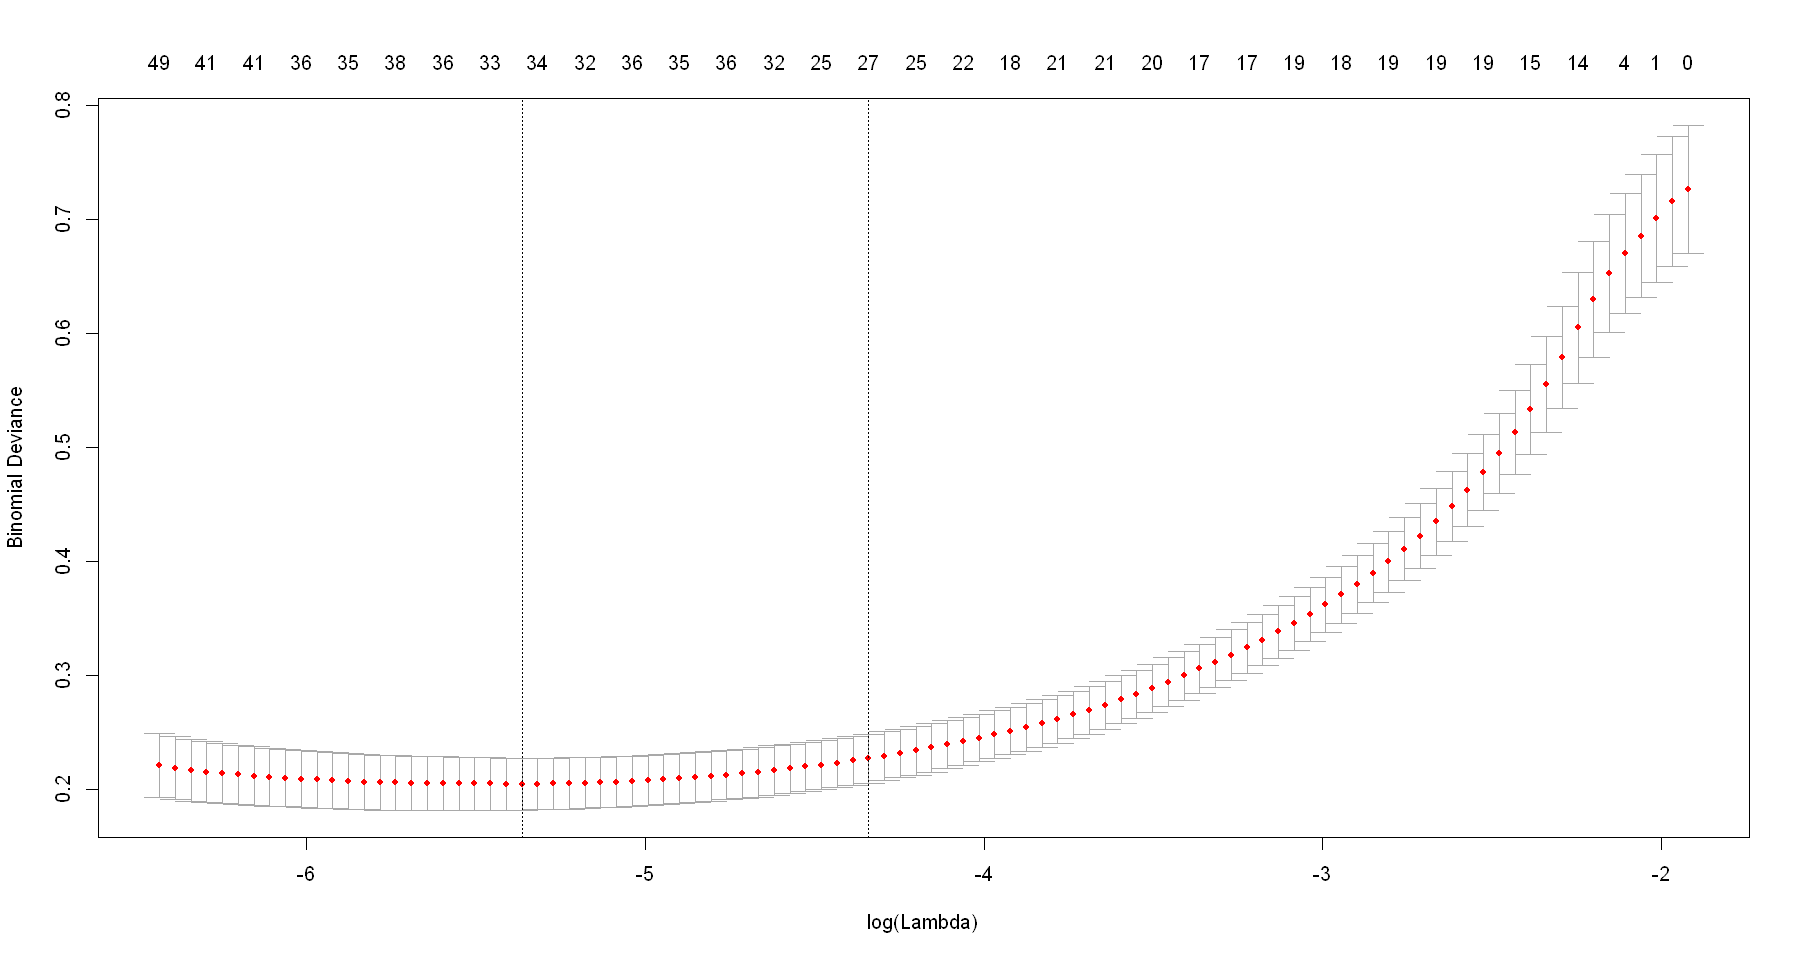

In [197]:
cvfit=cv.glmnet(mat,logreg_train$binary,family='binomial',type.measure='deviance', nfold=10)
plot(cvfit)

In [213]:
cf=coef(cvfit,s="lambda.1se")
cf[cf[,1]!=0,]
length(cf[cf[,1]!=0,])

(Intercept)         X. 19         X. 43         X. 44         X. 56 
-3.4718330768 -0.0571842252 -0.0081760658 -0.2217673099 -0.0107506596 
        X. 87        X. 210        X. 234        X. 235        X. 236 
-0.1164937050  0.0674122388  0.6737189472  0.0945050984  0.0140595342 
       X. 250        X. 258        X. 282        X. 294        X. 295 
 0.0431435535  0.5103281643  0.7463182102  0.0022810950  0.2103511005 
       X. 314        X. 315        Y. 160        Y. 166        Y. 174 
 0.2411775231  0.1463813402  0.0437372767  0.8649631362  0.0621964834 
       Y. 192         Z. 98         Z. 99        Z. 183        Z. 188 
 0.4380344645  0.2515235348  0.0003274323 -0.0270864239 -0.0005582692 
       Z. 189        Z. 190        Z. 191 
-0.0064303366 -0.0300144813 -0.0466370711

[1] 28

In a total of 28 variables, there are only 4 Y variables and 7 Z variables 

In [214]:
cf_min=coef(cvfit,s="lambda.min")
cf_min[cf_min[,1]!=0,]
length(cf_min[cf_min[,1]!=0,])

(Intercept)        X. 17        X. 19        X. 43        X. 50        X. 88 
-4.832479131 -0.014378354 -0.060358172 -0.392836524 -0.044343406 -0.219484165 
      X. 144       X. 210       X. 234       X. 235       X. 236       X. 237 
-0.020134351  0.122660207  0.497603394  0.317576798  0.203423096  0.003731316 
      X. 249       X. 250       X. 258       X. 282       X. 286       X. 287 
 0.125561332  0.066741180  0.541231718  0.879436767  0.004404573  0.013252673 
      X. 290       X. 295       X. 315        Y. 12        Y. 13        Y. 19 
 0.090029657  0.205527801  0.611423342 -0.059553360 -0.003325850 -0.299150312 
      Y. 160       Y. 166       Y. 192       Y. 226        Z. 88        Z. 99 
 0.014116989  1.176926628  0.605518412  0.060342809  0.103271808  0.342573502 
      Z. 180       Z. 191       Z. 257 
-0.529488425 -0.034538762 -0.100762798

[1] 33

In a total of 33 variables, there are 7 Y variables and 5 Z variables 

1.se lambda will be used for prediction to avoid overfitting.

In [215]:
pred_glmnet_1se=predict(cvfit,mat_test,s='lambda.1se',type='response')
summary(pred_glmnet_1se)

       1            
 Min.   :0.0002008  
 1st Qu.:0.0046780  
 Median :0.0142258  
 Mean   :0.1256391  
 3rd Qu.:0.0711712  
 Max.   :0.9638578  

In [218]:
pred_prob

[1] 0.1183036

pred_prob was set to the ratio of Class 3 in train data. With the penalized approach threshold 0.118303571428571 is closer to the mean of proabilities computed bu the model

In [217]:
pred_prob=(sum(logreg_train$binary==TRUE)/nrow(logreg_train))

table(logreg_test$binary,pred_glmnet_1se>=pred_prob)

       
        FALSE TRUE
  FALSE  2802  326
  TRUE     20  434

Coefficients of the model indicates that movement in the X axis is a significant measure to classify Class 3. As we are considering Class 3 which is a line parallel to the ground, the movements in axes Y and Z could be creating noise.

### C)

In [ ]:
#Euclidean Distances as Model Inputs

In [225]:
big_num = 999999

In [226]:
train_indices=1:nrow(concatenated_train)
head(train_indices)
tail(train_indices)
test_indices=(nrow(concatenated_train)+1):(nrow(concatenated_train)+nrow(concatenated_test))
head(test_indices)
tail(test_indices)

[1] 1 2 3 4 5 6

[1] 891 892 893 894 895 896

[1] 897 898 899 900 901 902

[1] 4473 4474 4475 4476 4477 4478

In [224]:
complete_distance= dist((complete_series_concat[,-1]), method="euclidean", upper = T)

In [243]:
euc_dist_test_to_train = as.matrix(complete_distance)
diag(euc_dist_test_to_train) = big_num
euc_dist_test_to_train = euc_dist_test_to_train[test_indices,train_indices]
#euc_dist_test_to_train=cbind(euc_dist_test_to_train,concatenated_test$class)

In [244]:
head(euc_dist_test_to_train)
nrow(euc_dist_test_to_train)
ncol(euc_dist_test_to_train)

,1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
897,51.68756,13.26342,28.32155,39.54125,34.28679,38.21102,36.04586,48.76423,37.56808,59.42871,...,44.36689,49.49473,32.77733,51.24089,35.25719,43.64244,51.73824,41.01137,41.87053,28.34948
898,34.94735,54.33434,54.69452,46.73249,45.80013,46.54591,41.58290,37.51753,46.17326,31.87027,...,37.76089,42.29434,44.20783,38.80048,50.75335,42.98309,38.36250,44.87133,37.51762,55.64853
899,42.17192,25.57076,35.86093,42.16744,28.76008,37.98442,41.09122,44.31102,31.09547,50.16476,...,46.95266,50.50451,30.28056,39.45372,45.69517,47.53898,50.38680,40.43990,43.68849,35.51105
900,41.87696,34.26903,41.88419,44.84055,25.51754,43.33635,38.77343,38.42295,20.20412,50.38129,...,45.19798,53.93486,28.36898,42.63299,48.77538,49.69766,44.19728,42.86692,42.66795,41.61417
901,49.64224,14.39948,16.49077,41.30849,32.73789,37.11218,44.96458,47.15595,37.85653,57.15658,...,47.80669,46.90974,32.78380,49.97981,34.79418,40.93229,53.61811,46.63892,47.71537,22.19925
902,46.34265,37.14210,42.45922,46.20299,32.04720,42.30269,36.86977,37.99367,33.19378,47.91947,...,41.88324,51.99915,30.42622,38.74722,49.33934,45.97069,44.97836,38.11579,36.45461,43.07985


[1] 3582

[1] 896

In [233]:
euc_dist_train= dist((concatenated_train[,-1]), method="euclidean", upper = T)


In [252]:
euc_dist_train = as.matrix(euc_dist_train)
#diag(euc_dist_train) = 0
head(euc_dist_train)
nrow(euc_dist_train)
ncol(euc_dist_train)

1,2,3,4,5,6,7,8,9,10,...,887,888,889,890,891,892,893,894,895,896
0.00000,51.30385,46.49263,50.00557,40.53065,48.77339,49.78434,34.47481,38.36707,30.47860,...,46.01287,39.73031,41.26587,37.26560,52.64993,34.61732,40.36802,43.59052,47.17981,52.29014
51.30385,0.00000,26.15062,36.84757,32.71092,37.63036,38.19377,50.04145,37.77742,57.60482,...,46.03559,49.01368,32.31978,49.04021,34.11599,44.40307,54.65286,41.24253,43.26349,24.41367
46.49263,26.15062,0.00000,43.11491,34.68557,34.77018,52.90127,45.07319,39.31871,54.02186,...,49.77938,43.33303,34.88315,48.61401,36.60350,37.87980,49.85753,47.86957,52.75303,23.00783
50.00557,36.84757,43.11491,0.00000,45.09594,41.03078,39.72564,55.62494,49.68671,44.87356,...,41.21545,38.46376,47.07113,44.03824,33.65578,43.62841,45.17318,36.47610,37.77271,37.73935
40.53065,32.71092,34.68557,45.09594,0.00000,36.55246,44.96919,34.49307,20.71561,48.63792,...,47.36377,53.91140,17.27920,36.79339,49.61586,44.74386,44.68900,45.79881,44.43520,39.75526
48.77339,37.63036,34.77018,41.03078,36.55246,0.00000,48.51623,48.43767,42.56081,51.06056,...,48.74836,52.96310,37.81844,42.26116,40.39066,46.14251,39.92165,43.24382,47.93611,32.42908


[1] 896

[1] 896

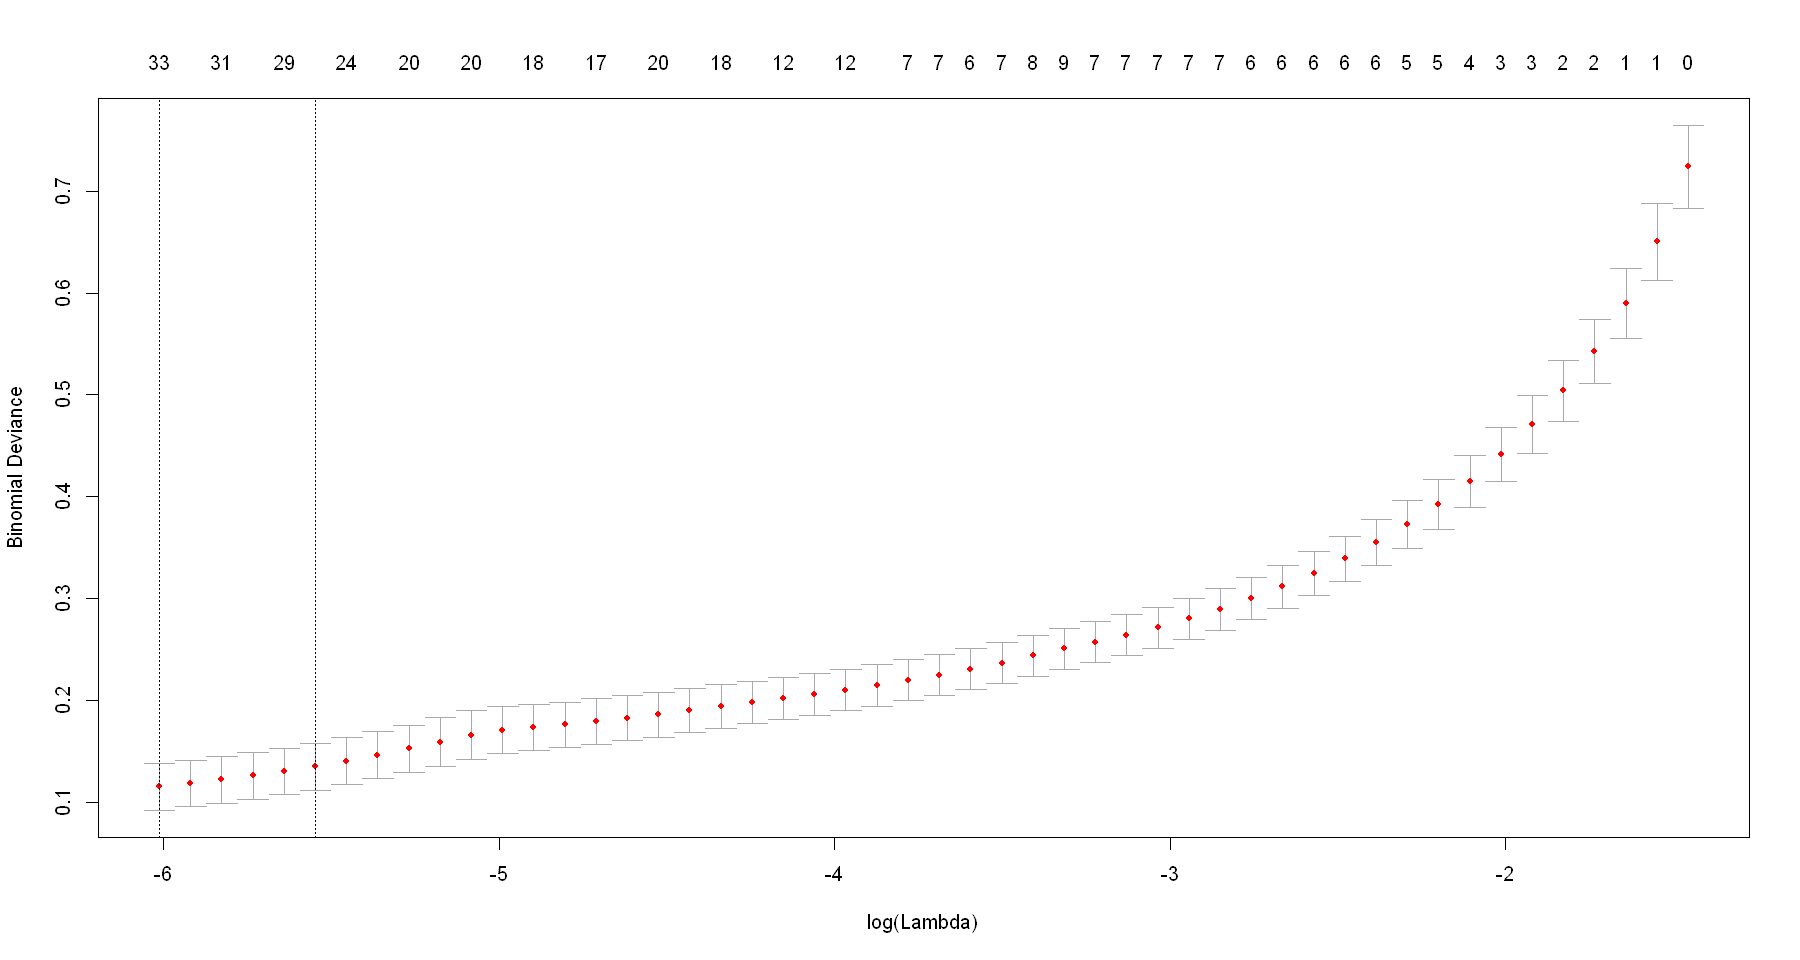

In [253]:
cvfit_distances=cv.glmnet(euc_dist_train, logreg_train$binary,family='binomial',type.measure='deviance', nfold=10)
plot(cvfit_distances)

In [254]:
cf=coef(cvfit_distances,s="lambda.1se")
cf[cf[,1]!=0,]
length(cf[cf[,1]!=0,])

(Intercept)             4           112           130           138 
38.4020307301 -0.0192273060 -0.0557158768 -0.0020405100  0.0007304845 
          189           223           235           320           372 
-0.0499191341  0.0038212506  0.0076472393 -0.0579485929  0.0871079605 
          383           394           424           441           450 
 0.0237800458 -0.0448040796 -0.0914544719 -0.0074921039 -0.1674961015 
          515           521           536           605           646 
-0.0874208058 -0.0768586108 -0.1824389237 -0.0055769574 -0.0668181811 
          723           732           746           808           813 
-0.0550083715 -0.1214682394 -0.0108331290 -0.0615225241 -0.0002704445 
          833           834           883           888           891 
-0.0817183382  0.0120656988 -0.0186163894 -0.0246555776  0.1294151712

[1] 30

In [255]:
cf_min=coef(cvfit_distances,s="lambda.min")
cf_min[cf_min[,1]!=0,]
length(cf_min[cf_min[,1]!=0,])

(Intercept)            4           36          112          138          189 
44.467829432 -0.059097919  0.060918241 -0.070760773  0.008199877 -0.070233779 
         223          235          319          320          331          372 
 0.009151814  0.034301488 -0.009771515 -0.063099715 -0.002911284  0.104337551 
         383          394          399          424          441          450 
 0.043424046 -0.059290438 -0.022918318 -0.114174633 -0.023464722 -0.205195716 
         484          515          521          536          605          611 
 0.018828603 -0.090099927 -0.117058235 -0.215740574 -0.019025179  0.002003965 
         646          723          732          746          778          808 
-0.067895901 -0.033739301 -0.173682753 -0.004113374 -0.005120311 -0.080295990 
         813          833          883          891 
-0.030729890 -0.092341801 -0.060609365  0.230948201

[1] 34

In [289]:
vars=row.names(as.data.frame(cf_min[cf_min[,1]!=0,]))
vars=vars[-1]
vars = as.numeric(vars)
concatenated_train[vars,]$class
logreg_train[vars,]$binary

[1] 3 6 3 6 3 6 5 3 3 3 4 6 3 3 3 3 3 6 3 3 3 3 7 3 3 3 3 3 3 3 3 3 5

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE FALSE
[13]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
[25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE

In this setting coefficients imply the effect of the distance with i th series on the probability of being in Class 3. The observations with non-zero coefficients are mostly in Class 3.

In [256]:
pred_glmnet_1se_dist=predict(cvfit_distances,euc_dist_test_to_train,s='lambda.1se',type='response')
summary(pred_glmnet_1se_dist)

       1            
 Min.   :0.0000022  
 1st Qu.:0.0002509  
 Median :0.0013580  
 Mean   :0.1167597  
 3rd Qu.:0.0154509  
 Max.   :0.9961563  

In [257]:
pred_prob=(sum(logreg_train$binary==TRUE)/nrow(logreg_train))

table(logreg_test$binary,pred_glmnet_1se_dist>=pred_prob)

       
        FALSE TRUE
  FALSE  2952  176
  TRUE     21  433

### D)

COMPARING ALL METHODS

The first method used inTask 1 was to classify series based on Euclidean and Manhattan distances with 1-NN approach. The parameter of nearest neighbor approach is defined with 10-fold cross-validation and compared with the value which has the closest accuracy based on runtimes. Accuracies obtained by Manhattan and Euclidean distances are given below.

In [291]:
k[1] 

[[1]]
[1] 0.9480737

In [292]:
man_1[1]

[[1]]
[1] 0.9542155

Since we considered binary classificaiton of Class 3 in remaining methods, to compare all results of the classes obtained by methods above are cumulated to represent TRUE Class3 representations vs FALSE Class 3 representations

In [306]:
results_for_euc = as.data.table(k[3])
results_for_euc[,class3_binary:=class == 3]
results_for_euc[,class3_binary_pred:=NN_euc_class == 3]


In [312]:
table1 = table(results_for_euc$class3_binary,results_for_euc$class3_binary_pred)
table1
sum(table1)

       
        FALSE TRUE
  FALSE  3109   19
  TRUE     37  417

[1] 3582

In [319]:
method1_acc = (table1[2,2] + table1[1,1]) / sum(table1)
method1_acc

[1] 0.9843663

In [323]:
results_for_man = as.data.table(man_1[3])
results_for_man[,class3_binary:=class == 3]
results_for_man[,class3_binary_pred:=NN_euc_class == 3]
table2 = table(results_for_man$class3_binary,results_for_man$class3_binary_pred)
table2

       
        FALSE TRUE
  FALSE  3112   16
  TRUE     36  418

In [324]:
method2_acc = (table2[2,2] + table1[1,1]) / sum(table2)
method2_acc

[1] 0.9846454

Accuracy values for the classification of Class 3 is 0.98 for both methods.

In task B, first approach was to identify Class 3 series with Logistic Regression. At first the features are chosen as the acceleration values on X,Y,Z axes at each time point. The threshold probability determined as the ratio of Class 3 series in the train set which is 0.118303571428571. The accuracy is calculated as 0.53. Which is lower than the distance based approaches.

In [325]:
pred_prob

[1] 0.1183036

In [327]:
table3 = table(logreg_test$binary,logreg_pred>=pred_prob)
table3
method3_acc = (table3[2,2] + table3[1,1]) / sum(table3)
method3_acc

       
        FALSE TRUE
  FALSE  1656 1472
  TRUE    209  245

[1] 0.5307091

A penalized Logistic Regression model with lasso penalties is trained with same features. The accuracy 0.903405918481295 is significantly higher than the logistic regression without penalties. 

In [328]:
table4 = table(logreg_test$binary,pred_glmnet_1se>=pred_prob)
table4
method4_acc = (table4[2,2] + table4[1,1]) / sum(table4)
method4_acc

       
        FALSE TRUE
  FALSE  2802  326
  TRUE     20  434

[1] 0.9034059

Another approach was to train a penalized logistic regression model with distances as features to identify Class 3 series. The accuracy of the method is 0.94500279173646. 

In [329]:
table5 = table(logreg_test$binary,pred_glmnet_1se_dist>=pred_prob)
table5
method5_acc = (table5[2,2] + table5[1,1]) / sum(table5)
method5_acc

       
        FALSE TRUE
  FALSE  2952  176
  TRUE     21  433

[1] 0.9450028

In [351]:
comp_acc=data.table( "method"=c("euclidean 1-nn","manhattan 1-nn", "logreg", "penalized logreg", "distance penalize logreg" ), 
                    "accuracy"=c(method1_acc,
method2_acc,
method3_acc,
method4_acc,
method5_acc))

In [352]:
comp_acc[order(comp_acc$accuracy, decreasing=TRUE),]

method,accuracy
manhattan 1-nn,0.9846454
euclidean 1-nn,0.9843663
distance penalize logreg,0.9450028
penalized logreg,0.9034059
logreg,0.5307091


Distance based approaches performed better. However it should be considered that although they are good for Class 3 they could have performed worse for other classes. Constraining the logistic regression resulted in better classification. The best logistic regression approach is the penalized one that uses distances as features.